In [5]:
# P4
import mdptoolbox.example
import numpy as np
import time
import matplotlib.pyplot as plt
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning, PolicyIterationModified
from hiive.mdptoolbox.example import forest

In [6]:
def get_policy_reward(P, R, policy, disc):
    num_state = P.shape[-1]
    num_epoch = 10
    total_reward = 0
    for state in range(num_state):
        state_reward = 0
        for epoch in range(num_epoch):
            epoch_reward = 0
            discount_rate = 1
            while True:
                action = policy[state]
                probs = P[action][state]
                all_next_states = list(range(len(probs)))
                next_state = np.random.choice(all_next_states, 1, p=probs)[0]
                reward = R[state][action]
                epoch_reward = epoch_reward + reward
                discount_rate = discount_rate*disc
                
                if (next_state==0):
                    break
            state_reward = state_reward+epoch_reward
        total_reward = total_reward + state_reward
    policy_reward = total_reward / (num_epoch*num_state)
#    print (policy_reward)
    return policy_reward

In [8]:
P, R = forest(S=1000, r1=4, r2=2)

disc_rate = [0.5, 0.7, 0.9, 0.99, 0.999]
eps = [1e-15, 1e-13, 1e-11,1e-9, 1e-7,1e-5, 1e-3, 1e-1, 0.2]
max_iter= [10, 50, 100, 500, 1000, 10000, 50000]

# 0: time, 1: reward, 2: iters, 3:meanV

vi_disc_var = np.zeros((len(disc_rate), 4))
vi_eps_var = np.zeros((len(eps), 4))
vi_iter_var = np.zeros((len(max_iter), 4))

pi_disc_var = np.zeros((len(disc_rate), 4))
pi_eps_var = np.zeros((len(eps), 4))
pi_iter_var = np.zeros((len(max_iter), 4))

ql_disc_var = np.zeros((len(disc_rate), 4))
ql_eps_var = np.zeros((len(eps), 4))
ql_iter_var = np.zeros((len(max_iter), 4))

print ('1')
for i in range(len(disc_rate)):
    vi = ValueIteration(P, R, disc_rate[i], epsilon = 0.9, max_iter = 10000)
    vi.run()
    vi_reward = get_policy_reward(P, R, vi.policy, disc_rate[i])    
    vi_disc_var[i,0] = vi.time
    vi_disc_var[i,1] = vi_reward
    vi_disc_var[i,2] = vi.iter
    vi_disc_var[i,3] = np.mean(vi.V)
    
    pi = PolicyIterationModified(P, R, disc_rate[i], epsilon = 0.9, max_iter = 10000)
    pi.run()
    pi_reward = get_policy_reward(P, R, pi.policy, disc_rate[i])    
    pi_disc_var[i,0] = pi.time
    pi_disc_var[i,1] = pi_reward
    pi_disc_var[i,2] = pi.iter
    pi_disc_var[i,3] = np.mean(pi.V)  
    
    ql = QLearning(P, R, disc_rate[i], epsilon = 0.9)
    ql.run()
    ql_reward = get_policy_reward(P, R, ql.policy, disc_rate[i])    
    ql_disc_var[i,0] = ql.time
    ql_disc_var[i,1] = ql_reward
#    ql_disc_var[i,2] = ql.iter
    ql_disc_var[i,3] = np.mean(ql.V)    
    print (np.mean(pi.V)  )
    
print ('2')    
for i in range(len(eps)):
    vi = ValueIteration(P, R, 0.99, epsilon = eps[i], max_iter = 10000)
    vi.run()
    vi_reward = get_policy_reward(P, R, vi.policy, 0.99)    
    vi_eps_var[i,0] = vi.time
    vi_eps_var[i,1] = vi_reward
    vi_eps_var[i,2] = vi.iter
    vi_eps_var[i,3] = np.mean(vi.V)
    
    pi = PolicyIterationModified(P, R, 0.99, epsilon = eps[i], max_iter = 10000)
    pi.run()
    pi_reward = get_policy_reward(P, R, pi.policy, 0.99)    
    pi_eps_var[i,0] = pi.time
    pi_eps_var[i,1] = pi_reward
    pi_eps_var[i,2] = pi.iter
    pi_eps_var[i,3] = np.mean(pi.V)  
    
    ql = QLearning(P, R, 0.99, epsilon =eps[i])
    ql.run()
    ql_reward = get_policy_reward(P, R, ql.policy, 0.99)    
    ql_eps_var[i,0] = ql.time
    ql_eps_var[i,1] = ql_reward
#    ql_eps_var[i,2] = ql.iter
    ql_eps_var[i,3] = np.mean(ql.V)    
    print (np.mean(pi.V)  )
    
print ('3')
for i in range(len(max_iter)):
    vi = ValueIteration(P, R, 0.99, epsilon = 0.9, max_iter = max_iter[i])
    vi.run()
    vi_reward = get_policy_reward(P, R, vi.policy, 0.99)    
    vi_iter_var[i,0] = vi.time
    vi_iter_var[i,1] = vi_reward
    vi_iter_var[i,2] = vi.iter
    vi_iter_var[i,3] = np.mean(vi.V)
    
    pi = PolicyIterationModified(P, R, 0.99, epsilon = 0.9, max_iter = max_iter[i])
    pi.run()
    pi_reward = get_policy_reward(P, R, pi.policy, 0.99)    
    pi_iter_var[i,0] = pi.time
    pi_iter_var[i,1] = pi_reward
    pi_iter_var[i,2] = pi.iter
    pi_iter_var[i,3] = np.mean(pi.V)  
    
    if (max_iter[i] < 10000):        
        ql = QLearning(P, R, 0.99, epsilon = 0.9)
    else:
        ql = QLearning(P, R, 0.99, epsilon =0.9, n_iter = max_iter[i])
    ql.run()
    ql_reward = get_policy_reward(P, R, ql.policy, 0.99)    
    ql_iter_var[i,0] = ql.time
    ql_iter_var[i,1] = ql_reward
#    ql_iter_var[i,2] = ql.iter
    ql_iter_var[i,3] = np.mean(ql.V)  
    print (np.mean(pi.V)  )

1
1.2999506865625003
1.9079753355534974
5.032330864391785
47.224433173199095
473.3371674538765
2
47.853392534465705
47.853392534465705
47.85339253445942
47.85339253377079
47.85339246440309
47.853385542996634
47.85269486562352
47.78306992015215
47.714108359812705
3
41.44288177567936
47.12940704639529
47.18533876650598
47.224433173199095
47.224433173199095
47.224433173199095
47.224433173199095


In [11]:
vi = ValueIteration(P, R, 0.99, epsilon = 0.9,max_iter = 10000)
vi = PolicyIterationModified(P, R, 0.99,epsilon = 0.9, max_iter = 10000)
ql = QLearning(P, R, 0.99, epsilon = 0.9, n_iter = 10000)
vi.run()
pi.run()
ql.run()
print ('\nVI Forrest 1000 Best Policy')
print (vi.policy)
print ('\nPI Forrest 1000 Best Policy')
print (pi.policy)
print ('\nQL Forrest 1000 Best Policy')
print (ql.policy)


VI Forrest 1000 Best Policy
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

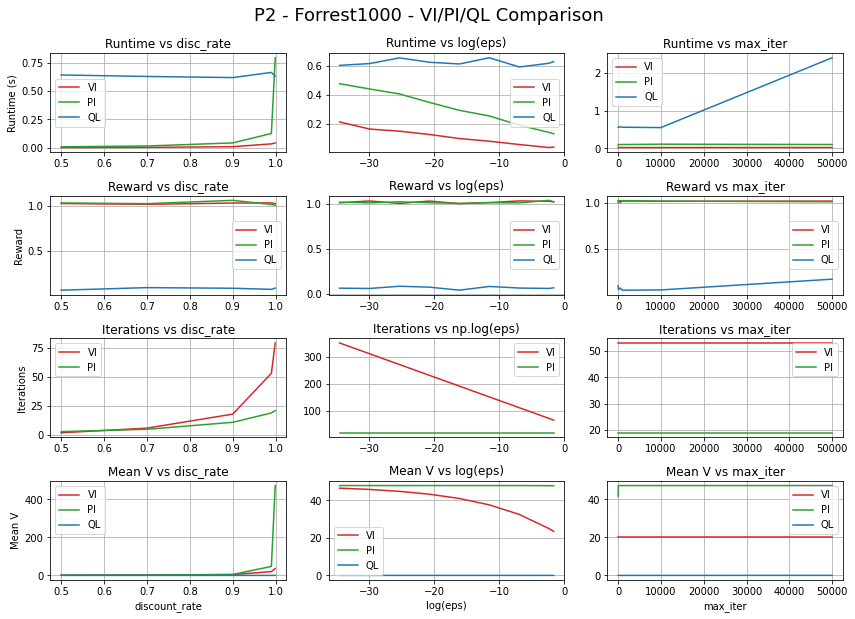

In [10]:
# combined
disc_rate = [0.5, 0.7, 0.9, 0.99, 0.999]
eps = [1e-15, 1e-13, 1e-11,1e-9, 1e-7,1e-5, 1e-3, 1e-1, 0.2]
max_iter= [10, 50, 100, 500, 1000, 10000, 50000]

fig, axs = plt.subplots(4,3, figsize=(12,9))

axs[0, 0].plot(disc_rate, vi_disc_var[:,0], 'tab:red', label ='VI')
axs[0, 0].plot(disc_rate, pi_disc_var[:,0], 'tab:green', label ='PI')
axs[0, 0].plot(disc_rate, ql_disc_var[:,0], 'tab:blue', label ='QL')
axs[0, 0].set_title('Runtime vs disc_rate')
axs[0, 0].set(ylabel='Runtime (s)')
axs[0, 0].grid()
axs[0, 0].legend()
axs[0, 1].plot(np.log(eps), vi_eps_var[:,0], 'tab:red', label ='VI')
axs[0, 1].plot(np.log(eps), pi_eps_var[:,0], 'tab:green', label ='PI')
axs[0, 1].plot(np.log(eps), ql_eps_var[:,0], 'tab:blue', label ='QL')
axs[0, 1].set_title('Runtime vs log(eps)')
axs[0, 1].grid()
axs[0, 2].plot(max_iter, vi_iter_var[:,0], 'tab:red', label ='VI')
axs[0, 2].plot(max_iter, pi_iter_var[:,0], 'tab:green', label ='PI')
axs[0, 2].plot(max_iter, ql_iter_var[:,0], 'tab:blue', label ='QL')
axs[0, 2].set_title('Runtime vs max_iter')
axs[0, 2].grid()

axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 2].legend()


axs[1, 0].plot(disc_rate, vi_disc_var[:,1], 'tab:red', label ='VI')
axs[1, 0].plot(disc_rate, pi_disc_var[:,1], 'tab:green', label ='PI')
axs[1, 0].plot(disc_rate, ql_disc_var[:,1], 'tab:blue', label ='QL')
axs[1, 0].set_title('Reward vs disc_rate')
axs[1, 0].set(ylabel='Reward')
axs[1, 0].grid()
axs[1, 1].plot(np.log(eps), vi_eps_var[:,1], 'tab:red', label ='VI')
axs[1, 1].plot(np.log(eps), pi_eps_var[:,1], 'tab:green', label ='PI')
axs[1, 1].plot(np.log(eps), ql_eps_var[:,1], 'tab:blue', label ='QL')
axs[1, 1].set_title('Reward vs log(eps)')
axs[1, 1].grid()
axs[1, 2].plot(max_iter, vi_iter_var[:,1], 'tab:red', label ='VI')
axs[1, 2].plot(max_iter, pi_iter_var[:,1], 'tab:green', label ='PI')
axs[1, 2].plot(max_iter, ql_iter_var[:,1], 'tab:blue', label ='QL')
axs[1, 2].set_title('Reward vs max_iter')
axs[1, 2].grid()

axs[1, 0].legend()
axs[1, 1].legend()
axs[1, 2].legend()

axs[2, 0].plot(disc_rate, vi_disc_var[:,2], 'tab:red', label ='VI')
axs[2, 0].plot(disc_rate, pi_disc_var[:,2], 'tab:green', label ='PI')
#axs[2, 0].plot(disc_rate, ql_disc_var[:,2], 'tab:blue', label ='QL')
axs[2, 0].set_title('Iterations vs disc_rate')
axs[2, 0].set(ylabel='Iterations')
axs[2, 0].grid()
axs[2, 1].plot(np.log(eps), vi_eps_var[:,2], 'tab:red', label ='VI')
axs[2, 1].plot(np.log(eps), pi_eps_var[:,2], 'tab:green', label ='PI')
#axs[2, 1].plot(np.log(eps), ql_eps_var[:,2], 'tab:blue', label ='QL')
axs[2, 1].set_title('Iterations vs np.log(eps)')
axs[2, 1].grid()
axs[2, 2].plot(max_iter, vi_iter_var[:,2], 'tab:red', label ='VI')
axs[2, 2].plot(max_iter, pi_iter_var[:,2], 'tab:green', label ='PI')
#axs[2, 2].plot(max_iter, ql_iter_var[:,2], 'tab:blue', label ='QL')
axs[2, 2].set_title('Iterations vs max_iter')
axs[2, 2].grid()

axs[2, 0].legend()
axs[2, 1].legend()
axs[2, 2].legend()

axs[3, 0].plot(disc_rate, vi_disc_var[:,3], 'tab:red', label ='VI')
axs[3, 0].plot(disc_rate, pi_disc_var[:,3], 'tab:green', label ='PI')
axs[3, 0].plot(disc_rate, ql_disc_var[:,3], 'tab:blue', label ='QL')
axs[3, 0].set_title('Mean V vs disc_rate')
axs[3, 0].set(xlabel='discount_rate')
axs[3, 0].set(ylabel='Mean V')
axs[3, 0].grid()
axs[3, 1].plot(np.log(eps), vi_eps_var[:,3], 'tab:red', label ='VI')
axs[3, 1].plot(np.log(eps), pi_eps_var[:,3], 'tab:green', label ='PI')
axs[3, 1].plot(np.log(eps), ql_eps_var[:,3], 'tab:blue', label ='QL')
axs[3, 1].set_title('Mean V vs log(eps)')
axs[3, 1].set(xlabel='log(eps)')
axs[3, 1].grid()
axs[3, 2].plot(max_iter, vi_iter_var[:,3], 'tab:red', label ='VI')
axs[3, 2].plot(max_iter, pi_iter_var[:,3], 'tab:green', label ='PI')
axs[3, 2].plot(max_iter, ql_iter_var[:,3], 'tab:blue', label ='QL')
axs[3, 2].set_title('Mean V vs max_iter')
axs[3, 2].set(xlabel='max_iter')
axs[3, 2].grid()

axs[3, 0].legend()
axs[3, 1].legend()
axs[3, 2].legend()

fig.suptitle('P2 - Forrest1000 - VI/PI/QL Comparison', fontsize=18)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
P, R = forest(S=100, r1=4, r2=2, p=0.3)
vi = ValueIteration(P, R, 0.999, epsilon = 0.9,max_iter = 10000)
pi = PolicyIterationModified(P, R, 0.999,epsilon = 0.9, max_iter = 10000)
ql = QLearning(P, R, 0.999, epsilon = 0.999, n_iter = 10000)
vi.run()
pi.run()
ql.run()
print ('\nVI Forrest 1000 Best Policy')
print (vi.policy)
print ('\nPI Forrest 1000 Best Policy')
print (pi.policy)
print ('\nQL Forrest 1000 Best Policy')
print (ql.policy)


VI Forrest 1000 Best Policy
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)

PI Forrest 1000 Best Policy
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)

QL Forrest 1000 Best Policy
(0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
